In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import datetime
import nltk
import re

In [5]:
data_t = pd.read_excel('QVI_transaction_data.xlsx')
data_p = pd.read_csv('QVI_purchase_behaviour.csv')

In [6]:
data_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [7]:
data_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [8]:
data_t.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [9]:
data_p.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [10]:
# change the date datatype to display the correct format of dates
def convertdate(x):
 serial = x
 seconds = (serial - 25569) * 86400.0
 return datetime.datetime.utcfromtimestamp(seconds)

data_t['DATE'] = data_t['DATE'].apply(lambda x:convertdate(x))

data_t.head(3)

C:\Users\vmsnr\AppData\Local\Temp\ipykernel_5252\2297814759.py:5: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  return datetime.datetime.utcfromtimestamp(seconds)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9


In [11]:
df = pd.DataFrame({'DATE':pd.date_range('2018-07-01', '2019-06-30')}) 
df.head()

,DATE
0,2018-07-01
1,2018-07-02
2,2018-07-03
3,2018-07-04
4,2018-07-05


In [12]:
# Merge df with data_t on DATE and check for the row with missing data
data_temp = pd.merge(data_t, df, on='DATE', how='outer')
null_data = data_temp[data_temp.isnull().any(axis=1)]
null_data

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
129325,2018-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Create a new dataframe which contains the total sale for each date

a = pd.pivot_table(data_t, values = 'TOT_SALES', index = 'DATE', aggfunc = 'sum')
a.head()

,TOT_SALES
DATE,
2018-07-01,5372.2
2018-07-02,5315.4
2018-07-03,5321.8
2018-07-04,5309.9
2018-07-05,5080.9


In [16]:
b = pd.DataFrame(index = pd.date_range(start = '2018-07-01', end = '2019-06-30'))
b['TOT_SALES'] = 0
len(b)

365

In [18]:
c = a + b
c.fillna(0, inplace = True)
c.head()

,TOT_SALES
2018-07-01,5372.2
2018-07-02,5315.4
2018-07-03,5321.8
2018-07-04,5309.9
2018-07-05,5080.9


In [20]:
c.index.name = 'Date'
c.rename(columns = {'TOT_SALES': 'Total Sales'}, inplace = True)
c.head()

,Total Sales
Date,
2018-07-01,5372.2
2018-07-02,5315.4
2018-07-03,5321.8
2018-07-04,5309.9
2018-07-05,5080.9


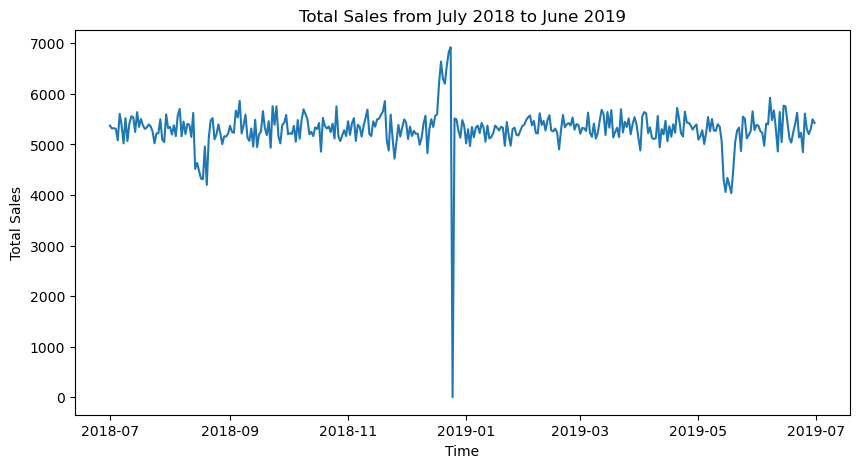

In [22]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
timeline = c.index
graph = c['Total Sales']

fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(timeline, graph)

date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)
plt.title('Total Sales from July 2018 to June 2019')
plt.xlabel('Time')
plt.ylabel('Total Sales')

plt.show()

In [24]:
# Confirm the date where sales count equals to zero
c[c['Total Sales'] == 0]

,Total Sales
Date,
2018-12-25,0.0


In [26]:
# Let's look at the December month only
c_december = c[(c.index < "2019-01-01") & (c.index > "2018-11-30")]
c_december.head()

,Total Sales
Date,
2018-12-01,5427.6
2018-12-02,5108.2
2018-12-03,5353.3
2018-12-04,5167.3
2018-12-05,5268.0


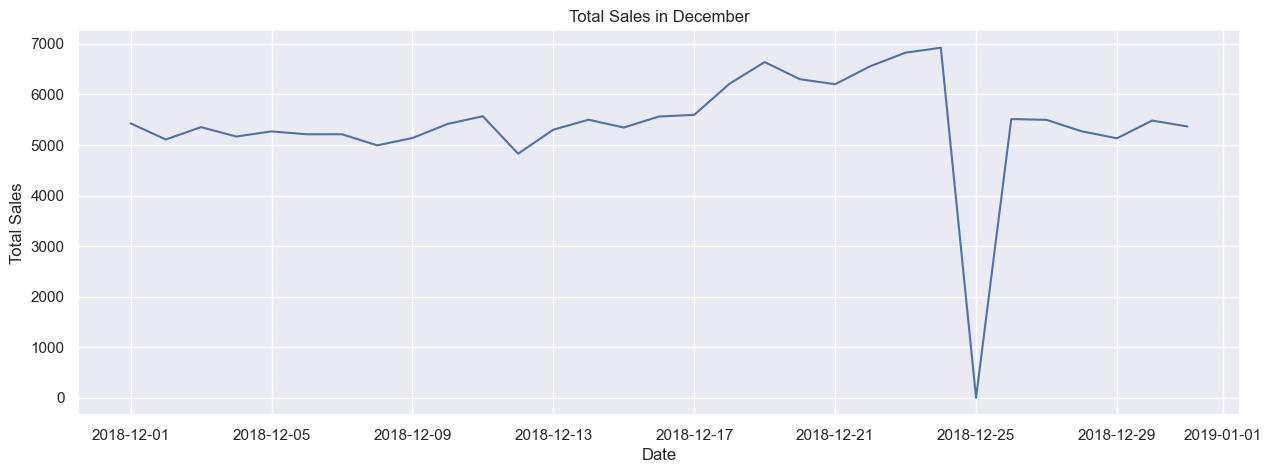

In [50]:
plt.figure(figsize = (15, 5))
plt.plot(c_december)
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('Total Sales in December')
plt.show()

In [32]:
# Create pack size column
search = []    
for values in data_t['PROD_NAME']:
    search.append(re.search(r'\d+', values).group())

data_t['Pack-size'] = search
data_t['Pack-size'] = pd.to_numeric(data_t['Pack-size'])

data_t.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack-size
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [34]:
# Check for the minimum and maximum packet sizes
print('Minimum pack size:' + str(data_t['Pack-size'].min())), print('Maximum pack size:' + str(data_t['Pack-size'].max()))

Minimum pack size:70
Maximum pack size:380


(None, None)

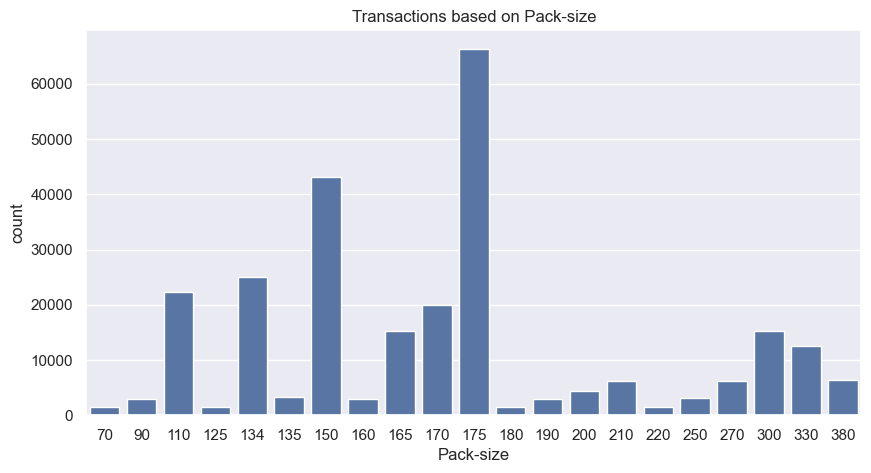

In [52]:
# Plot transactions based on Pack-size
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,5))
sns.countplot(x="Pack-size", data=data_t)
plt.title('Transactions based on Pack-size')
plt.show()

In [54]:
data_t['Brand'] = data_t['PROD_NAME'].str.partition(' ')[0]
data_t.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack-size,Brand
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle


In [56]:
# Check unique values for Brand
data_t['Brand'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'Woolworths', 'French', 'RRD', 'Tostitos',
       'Cheetos', 'Snbts', 'Sunbites'], dtype=object)

In [58]:
di = {'Dorito':'Doritos', 'Infzns':'Infuzions', 'Smith':'Smiths', 'GrnWves':'Grain', 'WW':'Woolworths', 'RRD':'Red', 'Snbts':'Sunbites', 'NCC':'Natural'}
data_t.replace({"Brand": di}, inplace=True)
data_t['Brand'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain', 'Doritos',
       'Twisties', 'Woolworths', 'Thins', 'Burger', 'Cheezels',
       'Infuzions', 'Red', 'Pringles', 'Tyrrells', 'Cobs', 'French',
       'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

In [60]:
# Display sample data from purchase behaviour data
data_p.head(3)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget


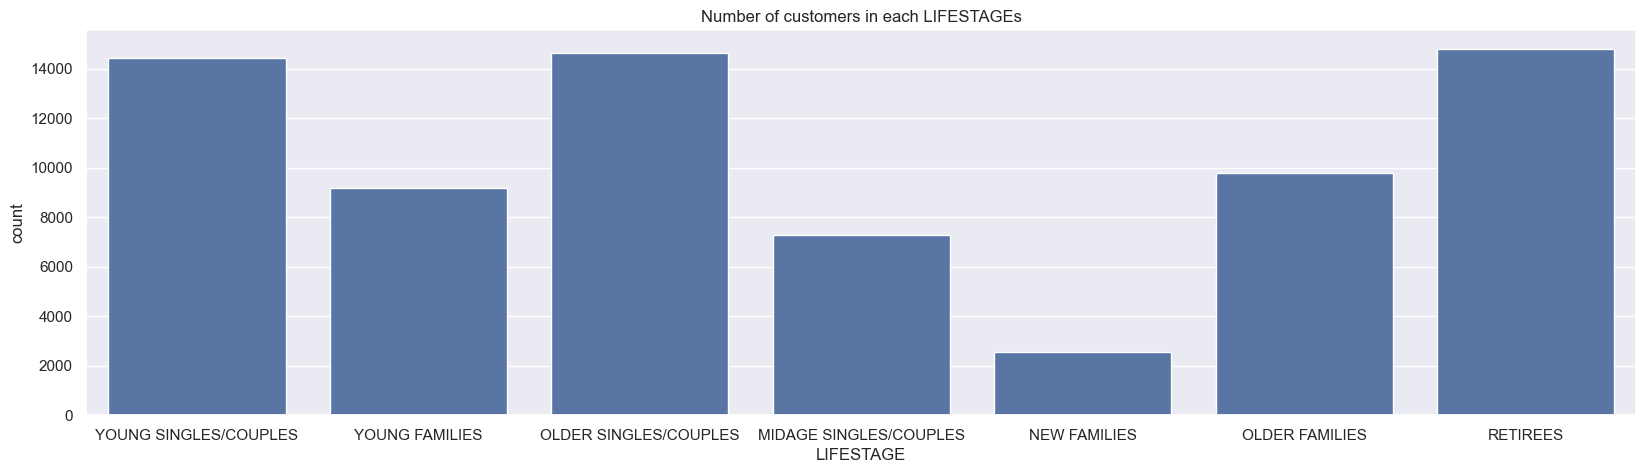

In [62]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(20,5))
sns.countplot(x="LIFESTAGE", data=data_p, dodge=False)
plt.title('Number of customers in each LIFESTAGEs')
plt.show()

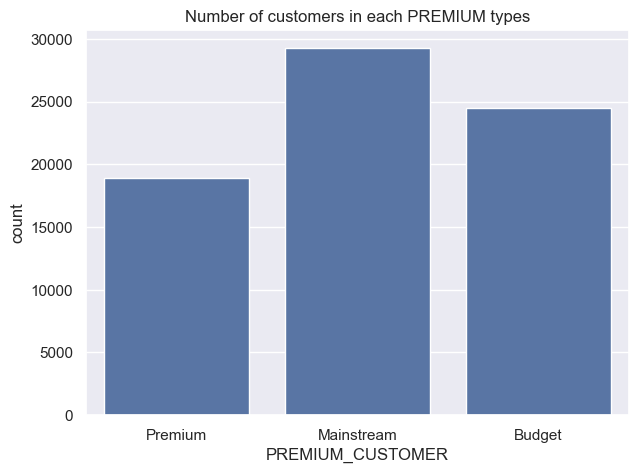

In [64]:
sns.set_theme(style="darkgrid")
plt.figure(figsize=(7,5))
sns.countplot(x="PREMIUM_CUSTOMER", data=data_p, dodge=False)
plt.title('Number of customers in each PREMIUM types')
plt.show()

<Figure size 2500x500 with 0 Axes>

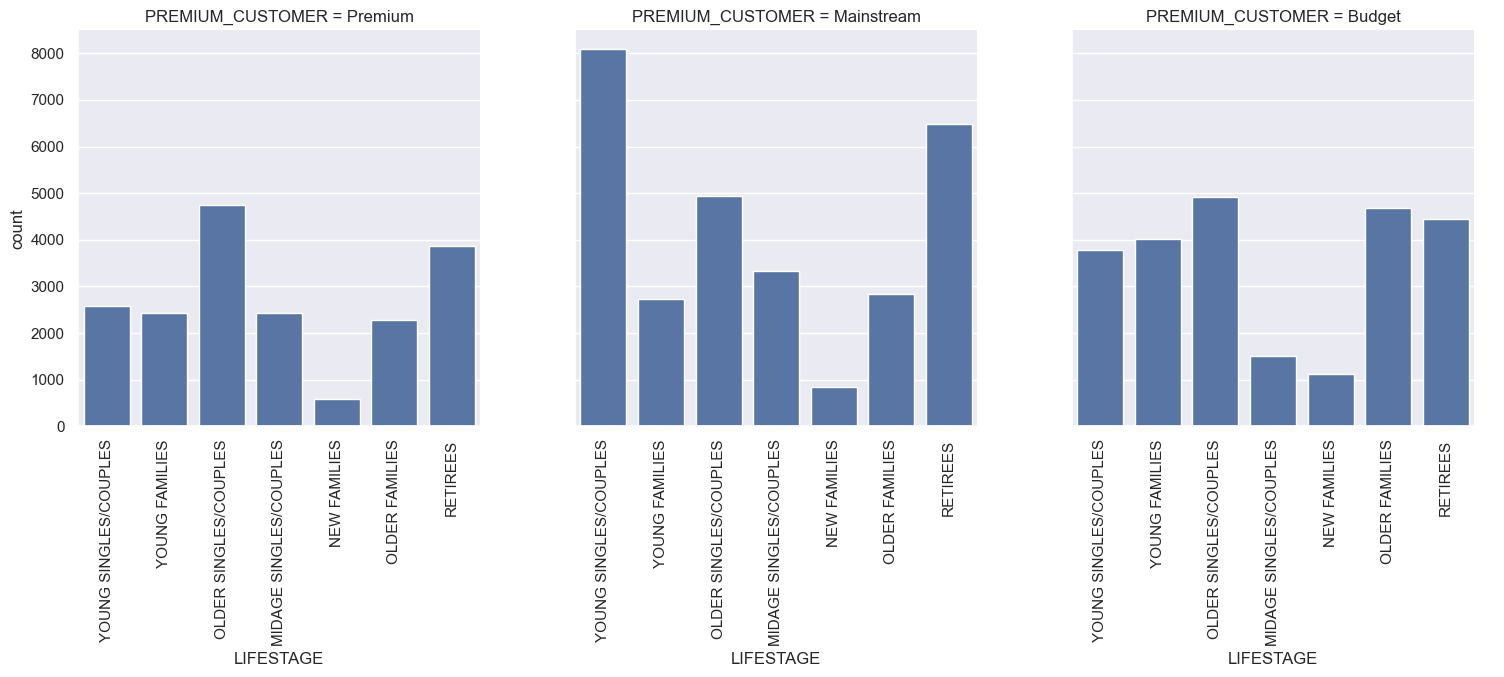

In [66]:
plt.figure(figsize=(25,5))
a = sns.catplot(x="LIFESTAGE", col="PREMIUM_CUSTOMER",
                data=data_p, kind="count")
a.set_xticklabels(rotation=90)
plt.show()

In [74]:
sales = pd.DataFrame(data_new.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).TOT_SALES.sum())
sales.rename(columns = {'TOT_SALES': 'Total Sales'}, inplace = True)
sales.sort_values(by = 'Total Sales', ascending = False, inplace = True)
sales

Total Sales
PREMIUM_CUSTOMER LIFESTAGE                          
Budget           OLDER FAMILIES            168363.25
Mainstream       YOUNG SINGLES/COUPLES     157621.60
                 RETIREES                  155677.05
Budget           YOUNG FAMILIES            139345.85
                 OLDER SINGLES/COUPLES     136769.80
Mainstream       OLDER SINGLES/COUPLES     133393.80
Premium          OLDER SINGLES/COUPLES     132263.15
Budget           RETIREES                  113147.80
Mainstream       OLDER FAMILIES            103445.55
Premium          RETIREES                   97646.05
Mainstream       YOUNG FAMILIES             92788.75
                 MIDAGE SINGLES/COUPLES     90803.85
Premium          YOUNG FAMILIES             84025.50
                 OLDER FAMILIES             81958.40
Budget           YOUNG SINGLES/COUPLES      61141.60
Premium          MIDAGE SINGLES/COUPLES     58432.65
                 YOUNG SINGLES/COUPLES      41642.10
Budget           MIDAGE SINGLES/COUPLES     35514.80
                 NEW FAMILIES               21928.45
Mainstream       NEW FAMILIES               17013.90
Premium          NEW FAMILIES               11491.10

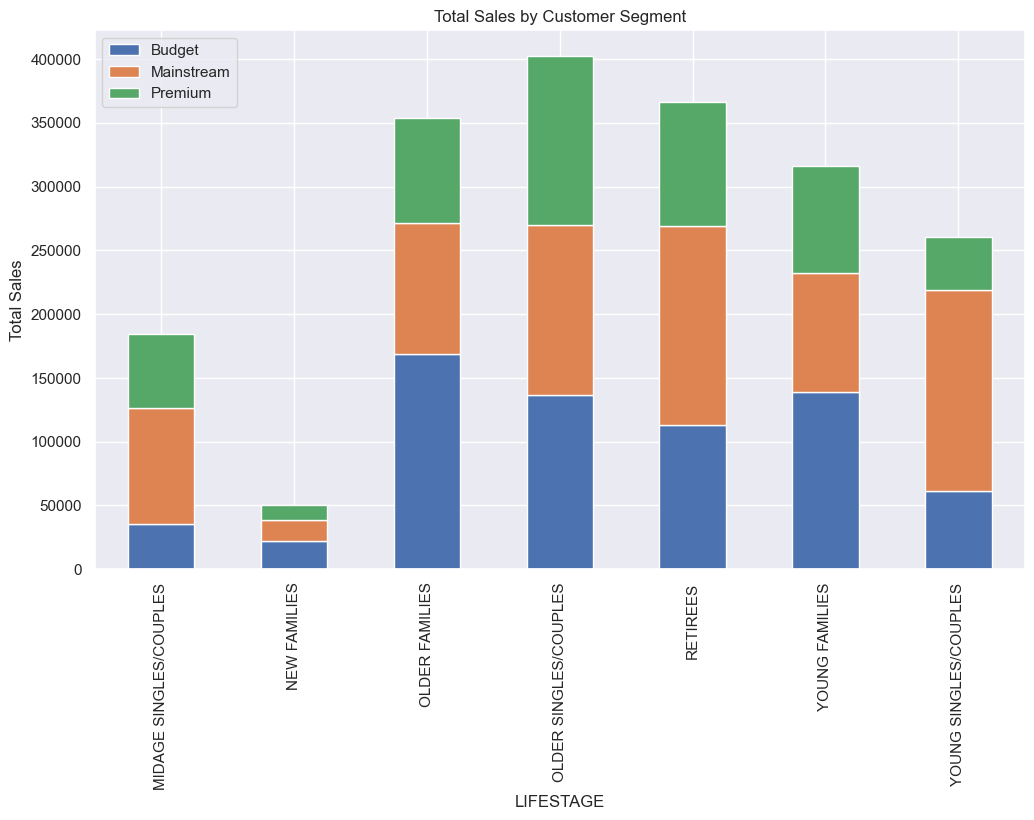

In [76]:
# Visualise
salesPlot = pd.DataFrame(data_new.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.sum())
salesPlot.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Total Sales by Customer Segment')
plt.ylabel('Total Sales')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)
plt.show()

In [78]:
customers = pd.DataFrame(data_new.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique())
customers.rename(columns = {'LYLTY_CARD_NBR': 'Number of Customers'}, inplace = True)
customers.sort_values(by = 'Number of Customers', ascending = False).head(10)

Number of Customers
PREMIUM_CUSTOMER LIFESTAGE                                 
Mainstream       YOUNG SINGLES/COUPLES                 8088
                 RETIREES                              6479
                 OLDER SINGLES/COUPLES                 4930
Budget           OLDER SINGLES/COUPLES                 4929
Premium          OLDER SINGLES/COUPLES                 4750
Budget           OLDER FAMILIES                        4675
                 RETIREES                              4454
                 YOUNG FAMILIES                        4017
Premium          RETIREES                              3872
Budget           YOUNG SINGLES/COUPLES                 3779

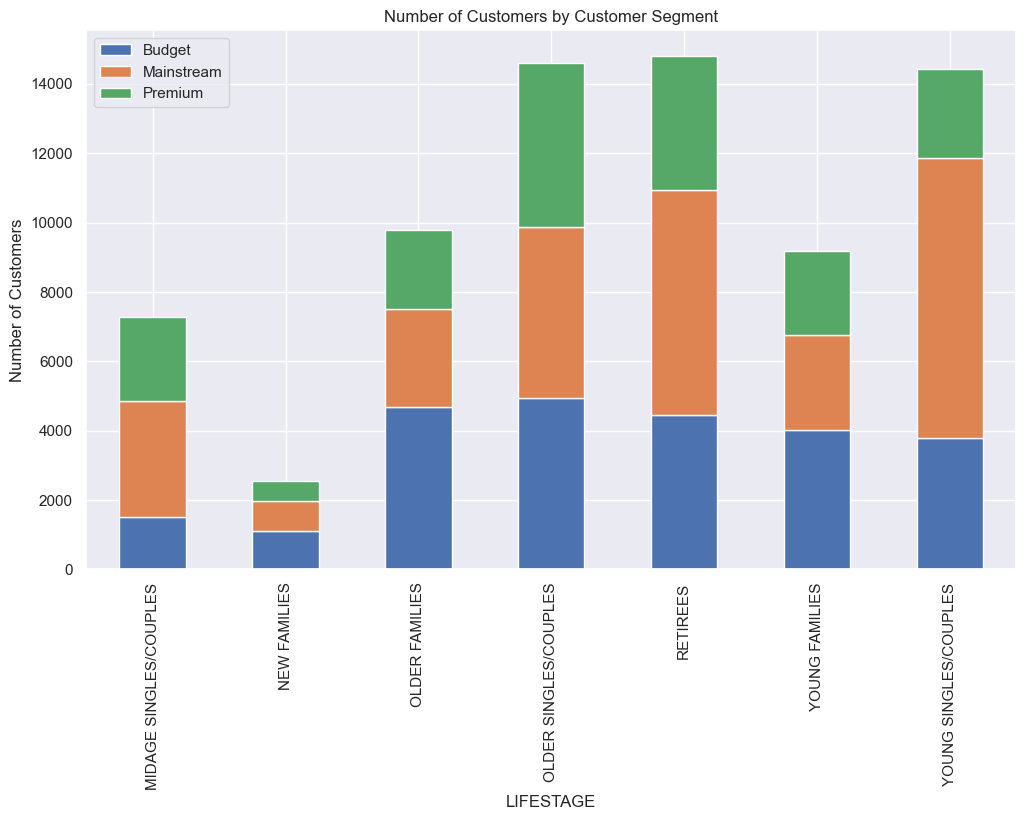

In [84]:
customersPlot = pd.DataFrame(data_new.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
customersPlot.unstack().plot(kind = 'bar', stacked = True, figsize = (12, 7), title = 'Number of Customers by Customer Segment')
plt.ylabel('Number of Customers')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)
plt.show()

In [92]:
df_ppu = data_new.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum() / data_new.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).LYLTY_CARD_NBR.nunique()
df_ppu = pd.DataFrame(df_ppu, columns = ['Average Unit per Customer'])
df_ppu.sort_values(by = 'Average Unit per Customer', ascending = False).head()

Average Unit per Customer
PREMIUM_CUSTOMER LIFESTAGE                                
Mainstream       OLDER FAMILIES                   9.804309
Premium          OLDER FAMILIES                   9.749780
Budget           OLDER FAMILIES                   9.639572
                 YOUNG FAMILIES                   9.238486
Premium          YOUNG FAMILIES                   9.209207

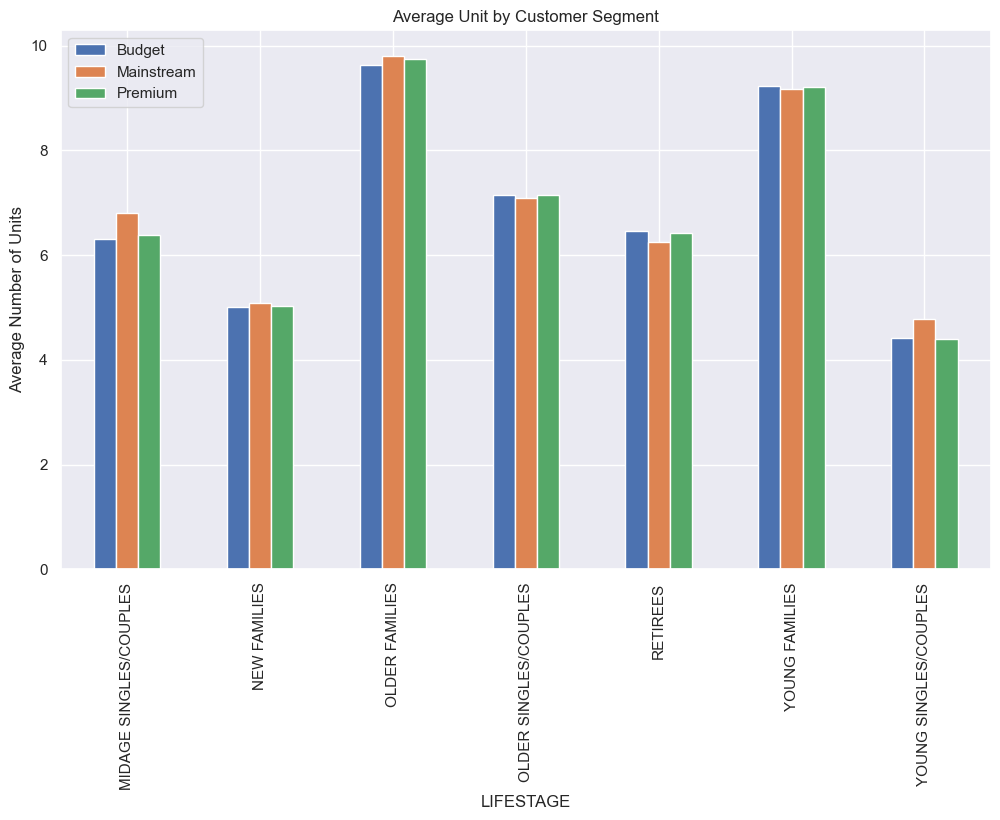

In [88]:
df_ppu_plot = pd.DataFrame(data_new.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).PROD_QTY.sum() / data_new.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).LYLTY_CARD_NBR.nunique())
df_ppu_plot.unstack().plot(kind = 'bar', figsize = (12, 7), title = 'Average Unit by Customer Segment')
plt.ylabel('Average Number of Units')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)
plt.show()

In [94]:
# Average price per unit by PREMIUM_CUSTOMER and LIFESTAGE
avg_price = data_new.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).TOT_SALES.sum() / data_new.groupby(['PREMIUM_CUSTOMER', 'LIFESTAGE']).PROD_QTY.sum()
avg_price = pd.DataFrame(avg_price, columns = ['Price per Unit'])
avg_price.sort_values(by = 'Price per Unit', ascending = False).head()

Price per Unit
PREMIUM_CUSTOMER LIFESTAGE                             
Mainstream       YOUNG SINGLES/COUPLES         4.080079
                 MIDAGE SINGLES/COUPLES        4.000346
                 NEW FAMILIES                  3.939315
Budget           NEW FAMILIES                  3.936178
                 RETIREES                      3.933660

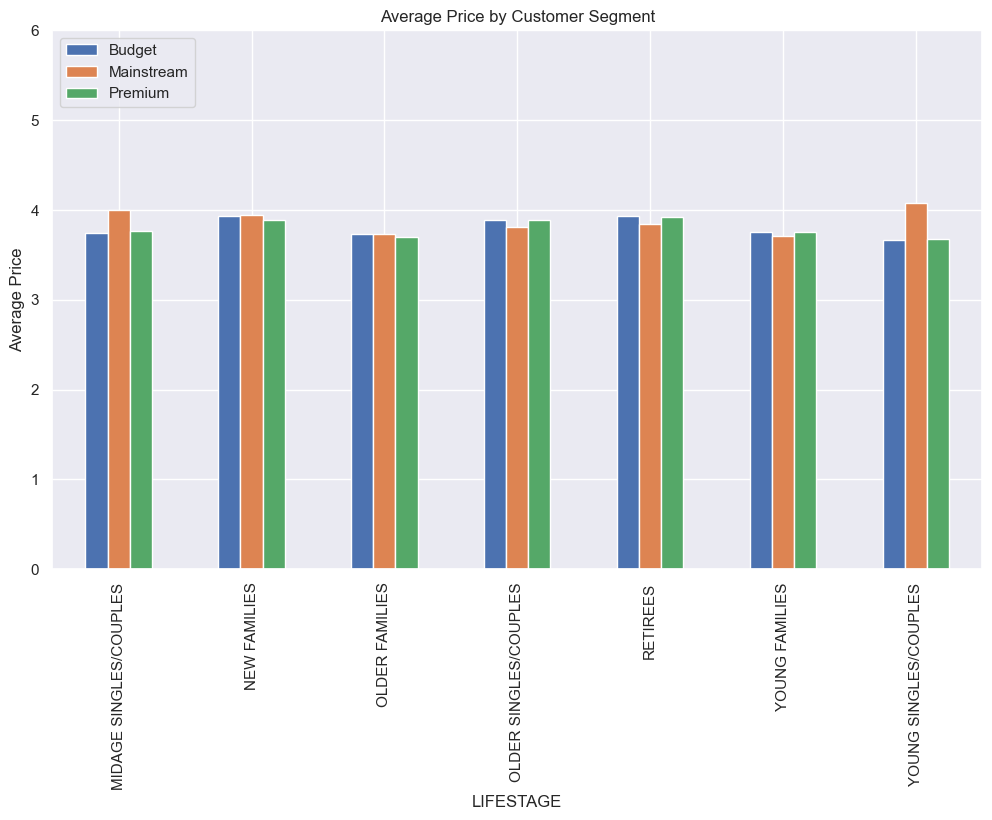

In [96]:
avg_price_plot = pd.DataFrame(data_new.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).TOT_SALES.sum() / data_new.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).PROD_QTY.sum())
avg_price_plot.unstack().plot(kind = 'bar', figsize = (12, 7), title = 'Average Price by Customer Segment', ylim = (0, 6))
plt.ylabel('Average Price')
plt.legend(['Budget', 'Mainstream', 'Premium'], loc = 2)
plt.show()

In [98]:
# Create a new dataframe pricePerUnit
ppu = data_new

# Create a new column under pricePerUnit called PRICE
ppu['PRICE'] = ppu['TOT_SALES'] / ppu['PROD_QTY']

ppu.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack-size,Brand,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget,1.45
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175,Smiths,MIDAGE SINGLES/COUPLES,Budget,3.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150,Kettle,MIDAGE SINGLES/COUPLES,Budget,4.60


In [100]:
# Group the data into mainstream and others
mainstream = ppu.loc[(ppu['PREMIUM_CUSTOMER'] == 'Mainstream') & ( (ppu['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (ppu['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') ), 'PRICE']
others = ppu.loc[(ppu['PREMIUM_CUSTOMER'] != 'Mainstream') & ( (ppu['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') | (ppu['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') ), 'PRICE']

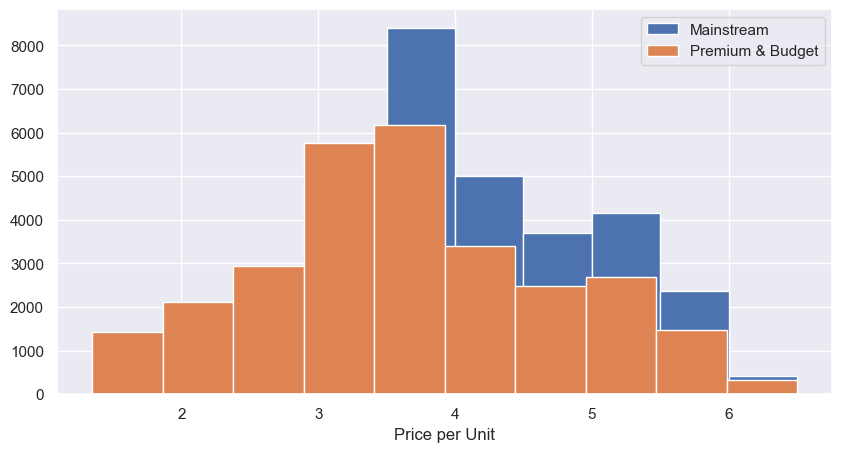

In [106]:
# Visualise
plt.figure(figsize = (10, 5))
plt.hist(mainstream, label = 'Mainstream')
plt.hist(others, label = 'Premium & Budget')
plt.legend()
plt.xlabel('Price per Unit')
plt.show()

In [108]:
print("Mainstream average price per unit: ${:.2f}".format(np.mean(mainstream)))
print("Non-mainstream average price per unit: ${:.2f}".format(np.mean(others)))
if np.mean(mainstream) > np.mean(others):
    print("Mainstream customers have higher average price per unit. ")
else:
    print("Non-mainstream customers have a higher average price per unit. ")

Mainstream average price per unit: $4.05
Non-mainstream average price per unit: $3.69
Mainstream customers have higher average price per unit. 


In [110]:
target = data_new.loc[(data_new['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (data_new['PREMIUM_CUSTOMER'] == 'Mainstream'), :]
nonTarget = data_new.loc[(data_new['LIFESTAGE'] != 'YOUNG SINGLES/COUPLES' ) & (data_new['PREMIUM_CUSTOMER'] != 'Mainstream'), :]
target.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Pack-size,Brand,LIFESTAGE,PREMIUM_CUSTOMER,PRICE
237702,2018-08-16,1,1020,26,19,Smiths Crinkle Cut Snag&Sauce 150g,1,2.6,150,Smiths,YOUNG SINGLES/COUPLES,Mainstream,2.6
237703,2018-08-17,1,1163,188,46,Kettle Original 175g,1,5.4,175,Kettle,YOUNG SINGLES/COUPLES,Mainstream,5.4
237704,2018-08-14,1,1291,333,27,WW Supreme Cheese Corn Chips 200g,1,1.9,200,Woolworths,YOUNG SINGLES/COUPLES,Mainstream,1.9
237705,2019-05-15,3,3031,1227,14,Smiths Crnkle Chip Orgnl Big Bag 380g,1,5.9,380,Smiths,YOUNG SINGLES/COUPLES,Mainstream,5.9
237706,2019-05-18,3,3118,1574,62,Pringles Mystery Flavour 134g,1,3.7,134,Pringles,YOUNG SINGLES/COUPLES,Mainstream,3.7


In [112]:
# Target Segment
targetBrand = target.loc[:, ['Brand', 'PROD_QTY']]
targetSum = targetBrand['PROD_QTY'].sum()
targetBrand['Target Brand Affinity'] = targetBrand['PROD_QTY'] / targetSum
targetBrand = pd.DataFrame(targetBrand.groupby('Brand')['Target Brand Affinity'].sum())

# Non-target segment
nonTargetBrand = nonTarget.loc[:, ['Brand', 'PROD_QTY']]
nonTargetSum = nonTargetBrand['PROD_QTY'].sum()
nonTargetBrand['Non-Target Brand Affinity'] = nonTargetBrand['PROD_QTY'] / nonTargetSum
nonTargetBrand = pd.DataFrame(nonTargetBrand.groupby('Brand')['Non-Target Brand Affinity'].sum())
     

# Merge the two dataframes together
brand_proportions = pd.merge(targetBrand, nonTargetBrand, left_index = True, right_index = True)
brand_proportions.head()

,Target Brand Affinity,Non-Target Brand Affinity
Brand,,
Burger,0.002744,0.006085
CCs,0.010484,0.017167
Cheetos,0.007533,0.010944
Cheezels,0.016851,0.017594
Cobs,0.041856,0.035786


In [114]:
brand_proportions['Affinity to Brand'] = brand_proportions['Target Brand Affinity'] / brand_proportions['Non-Target Brand Affinity']
brand_proportions.sort_values(by = 'Affinity to Brand', ascending = False)

,Target Brand Affinity,Non-Target Brand Affinity,Affinity to Brand
Brand,,,
Tyrrells,0.029587,0.023934,1.236200
Twisties,0.043306,0.035306,1.226610
Kettle,0.185649,0.155024,1.197555
Tostitos,0.042581,0.035694,1.192954
Old,0.041598,0.034882,1.192534
Pringles,0.111980,0.094107,1.189921
Cobs,0.041856,0.035786,1.169640
Doritos,0.122877,0.106542,1.153328
Infuzions,0.060649,0.053433,1.135046


In [116]:
# Target segment 
targetSize = target.loc[:, ['Pack-size', 'PROD_QTY']]
targetSum = targetSize['PROD_QTY'].sum()
targetSize['Target Pack Affinity'] = targetSize['PROD_QTY'] / targetSum
targetSize = pd.DataFrame(targetSize.groupby('Pack-size')['Target Pack Affinity'].sum())

# Non-target segment
nonTargetSize = nonTarget.loc[:, ['Pack-size', 'PROD_QTY']]
nonTargetSum = nonTargetSize['PROD_QTY'].sum()
nonTargetSize['Non-Target Pack Affinity'] = nonTargetSize['PROD_QTY'] / nonTargetSum
nonTargetSize = pd.DataFrame(nonTargetSize.groupby('Pack-size')['Non-Target Pack Affinity'].sum())

# Merge the two dataframes together
pack_proportions = pd.merge(targetSize, nonTargetSize, left_index = True, right_index = True)
pack_proportions.head()

,Target Pack Affinity,Non-Target Pack Affinity
Pack-size,,
70,0.002847,0.005848
90,0.005954,0.011739
110,0.099658,0.083371
125,0.002821,0.005562
134,0.111980,0.094107


In [118]:
pack_proportions['Affinity to Pack'] = pack_proportions['Target Pack Affinity'] / pack_proportions['Non-Target Pack Affinity']
pack_proportions.sort_values(by = 'Affinity to Pack', ascending = False)

,Target Pack Affinity,Non-Target Pack Affinity,Affinity to Pack
Pack-size,,,
270,0.029846,0.023333,1.279102
330,0.057465,0.047444,1.211233
110,0.099658,0.083371,1.195364
380,0.030156,0.025343,1.189936
134,0.111980,0.094107,1.189921
210,0.027309,0.023167,1.178769
135,0.013849,0.012036,1.150626
250,0.013460,0.011972,1.124304
170,0.075740,0.074782,1.012817
